# Paquetes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# Carga de datos

El dataframe contiene todas las variables indepeneintes que se analizarán para ver cuales se utilizarán para hacer el modelo predictivo. Hay variables climaticas (Bio_) y variables asociadas a distintos tipos de habitat (concretamente representan las disponibilidad de habitat en %).

Las varibales climáticas se han descargado desde el portal de [CHELSA](https://chelsa-climate.org/) y las variables asociadas al tipo de habitat se han descargado desde el portal de [GLOBIO](https://www.globio.info/globio-data-downloads). Los datos de CHELSA corresponden a un valor medio anual para el perido 1981-2010, y los datos de GLOBIO corresponden a datos del año 2010. Estos datos conformarán las variables independientes del escenario actual.

Variables climaticas: Tras la descarga, se ha utilizado QGIS para procesar los rasters descargados y poder calcular la media asociada a cada cuadricula mediante la herramienta 'Estadistica de zona'.

- **Bio_01_mea**: Temperatura media anual
- **Bio_02_mea**: Rango medio diurno (Media mensual (temperatura máxima - temperatura mínima))
- **Bio_03_mea**: Isotermalidad (BIO2/BIO7) (×100)
- **Bio_04_mea**: Estacionalidad de la temperatura (desviación estándar ×100)
- **Bio_05_mea**: Temperatura máxima del mes más cálido
- **Bio_06_mea**: Temperatura mínima del mes más frío
- **Bio_07_mea**: Rango Anual de Temperatura (BIO5-BIO6)
- **Bio_08_mea**: Temperatura media del trimestre más húmedo
- **Bio_09_mea**: Temperatura media del trimestre más seco
- **Bio_10_mea**: Temperatura media del trimestre más cálido
- **Bio_11_mea**: Temperatura media del trimestre más frío
- **Bio_12_mea**: Precipitación Anual
- **Bio_13_mea**: Precipitación del mes más húmedo
- **Bio_14_mea**: Precipitación del Mes Más Seco
- **Bio_15_mea**: Estacionalidad de las Precipitaciones (Coeficiente de Variación)
- **Bio_16_mea**: Precipitación del trimestre más húmedo
- **Bio_17_mea**: Precipitación del trimestre más seco
- **Bio_18_mea**: Precipitación del trimestre más cálido
- **Bio_19_mea**: Precipitación del Cuarto Más Frío

Variables del porcentaje de disponibilidad de habitat: los rasters descargados se han procesado previamente en python para extraer los datos asociados a cada cuadricula (consultar el jupyter notebook 'Procesamiento_Escenario_Actual_GLOBIO_2010.ipynb')
- **%_H_1**: Zonas acuaticas
- **%_H_2**: Vegetación Arbórea Perenne
- **%_H_3**: Vegetación Arbórea Caduca
- **%_H_4**: Matorrales y Pastizales



In [2]:
df = pd.read_excel('Data/Variables/Variables_coordenadas.xlsx')
df.head(2)

,ET_ID,%_H_1,%_H_2,%_H_3,%_H_4,Bio_01_mea,Bio_02_mea,Bio_03_mea,Bio_04_mea,Bio_05_mea,...,Bio_12_mea,Bio_13_mea,Bio_14_mea,Bio_15_mea,Bio_16_mea,Bio_17_mea,Bio_18_mea,Bio_19_mea,X,Y
0,249,35.2700,0.0,0.0,37.6820,18.2550,8.4956,0.3680,462.7157,29.4562,...,345.2101,47.5837,1.8524,57.2502,135.0578,13.5834,22.1311,126.7522,-2,35
1,280,90.1848,0.0,0.0,5.5578,19.1658,1.5286,0.1101,436.0108,26.6743,...,510.0062,98.9660,0.2310,83.7500,278.9490,7.2154,52.4094,173.7558,14,36


# Visualizaciones y correlaciones

## Descriptivos basicos

In [3]:
df.describe()

,ET_ID,%_H_1,%_H_2,%_H_3,%_H_4,Bio_01_mea,Bio_02_mea,Bio_03_mea,Bio_04_mea,Bio_05_mea,...,Bio_12_mea,Bio_13_mea,Bio_14_mea,Bio_15_mea,Bio_16_mea,Bio_17_mea,Bio_18_mea,Bio_19_mea,X,Y
count,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,...,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000
mean,3932.901159,16.845803,11.738309,5.664085,40.611678,9.369616,7.250499,0.270866,689.221605,23.273556,...,849.420520,110.733556,38.188998,33.748155,301.416525,130.050613,205.711969,217.023227,16.987122,49.178364
std,2091.565397,26.950924,19.630917,10.313388,29.060016,4.435653,2.443499,0.065128,164.592032,4.813873,...,389.957171,49.424853,23.563387,16.436418,136.061579,75.421030,112.677948,134.199974,13.321825,8.613684
min,249.000000,0.000000,0.000000,0.000000,0.000000,-3.345500,1.385100,0.100000,201.178200,10.375200,...,258.712700,35.396200,0.100000,9.548300,95.500400,1.333900,1.786400,67.138400,-11.000000,35.000000
25%,2237.250000,0.300200,0.086300,0.040950,13.366450,6.969250,5.779725,0.225925,581.738600,20.150325,...,620.186700,81.147325,26.974450,23.146950,220.770725,92.243650,131.166925,130.347975,7.000000,42.000000
50%,3633.500000,1.869550,1.868700,1.034800,38.419650,9.277650,7.271950,0.275500,704.411400,23.234550,...,734.820700,96.756000,35.531100,30.081000,261.803700,117.392650,214.397650,173.431000,18.000000,48.000000
75%,5217.750000,20.511175,14.278125,6.035825,64.692125,11.928525,8.882500,0.320875,809.598575,26.667575,...,933.571150,125.101075,47.808100,39.395850,335.980150,163.674000,262.347650,253.828850,27.000000,54.000000
max,9485.000000,96.999200,87.535500,81.044700,98.411500,20.363500,13.621800,0.422700,1036.244000,39.684900,...,4026.480600,473.482700,180.247800,106.074500,1364.767500,582.706500,772.477100,1257.801100,45.000000,71.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3106 entries, 0 to 3105
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ET_ID       3106 non-null   int64  
 1   %_H_1       3106 non-null   float64
 2   %_H_2       3106 non-null   float64
 3   %_H_3       3106 non-null   float64
 4   %_H_4       3106 non-null   float64
 5   Bio_01_mea  3106 non-null   float64
 6   Bio_02_mea  3106 non-null   float64
 7   Bio_03_mea  3106 non-null   float64
 8   Bio_04_mea  3106 non-null   float64
 9   Bio_05_mea  3106 non-null   float64
 10  Bio_06_mea  3106 non-null   float64
 11  Bio_07_mea  3106 non-null   float64
 12  Bio_08_mea  3106 non-null   float64
 13  Bio_09_mea  3106 non-null   float64
 14  Bio_10_mea  3106 non-null   float64
 15  Bio_11_mea  3106 non-null   float64
 16  Bio_12_mea  3106 non-null   float64
 17  Bio_13_mea  3106 non-null   float64
 18  Bio_14_mea  3106 non-null   float64
 19  Bio_15_mea  3106 non-null  

In [5]:
df.columns

Index(['ET_ID', '%_H_1', '%_H_2', '%_H_3', '%_H_4', 'Bio_01_mea', 'Bio_02_mea',
       'Bio_03_mea', 'Bio_04_mea', 'Bio_05_mea', 'Bio_06_mea', 'Bio_07_mea',
       'Bio_08_mea', 'Bio_09_mea', 'Bio_10_mea', 'Bio_11_mea', 'Bio_12_mea',
       'Bio_13_mea', 'Bio_14_mea', 'Bio_15_mea', 'Bio_16_mea', 'Bio_17_mea',
       'Bio_18_mea', 'Bio_19_mea', 'X', 'Y'],
      dtype='object')

La primera variables es un indicativo de la cuadricula, es el ID asociado a cada cuadricula. Las variables X Y indican las coordenadas de los centroides de la malla de 50x50 Km, por lo que no se usaran como variables independientes.

In [6]:
# Separar las columnas que no son variables independientes, si no identificadores
identificadores = df[['ET_ID', 'X', 'Y']]
variables_independientes = df.drop(columns=['ET_ID', 'X', 'Y'])

### Histogramas

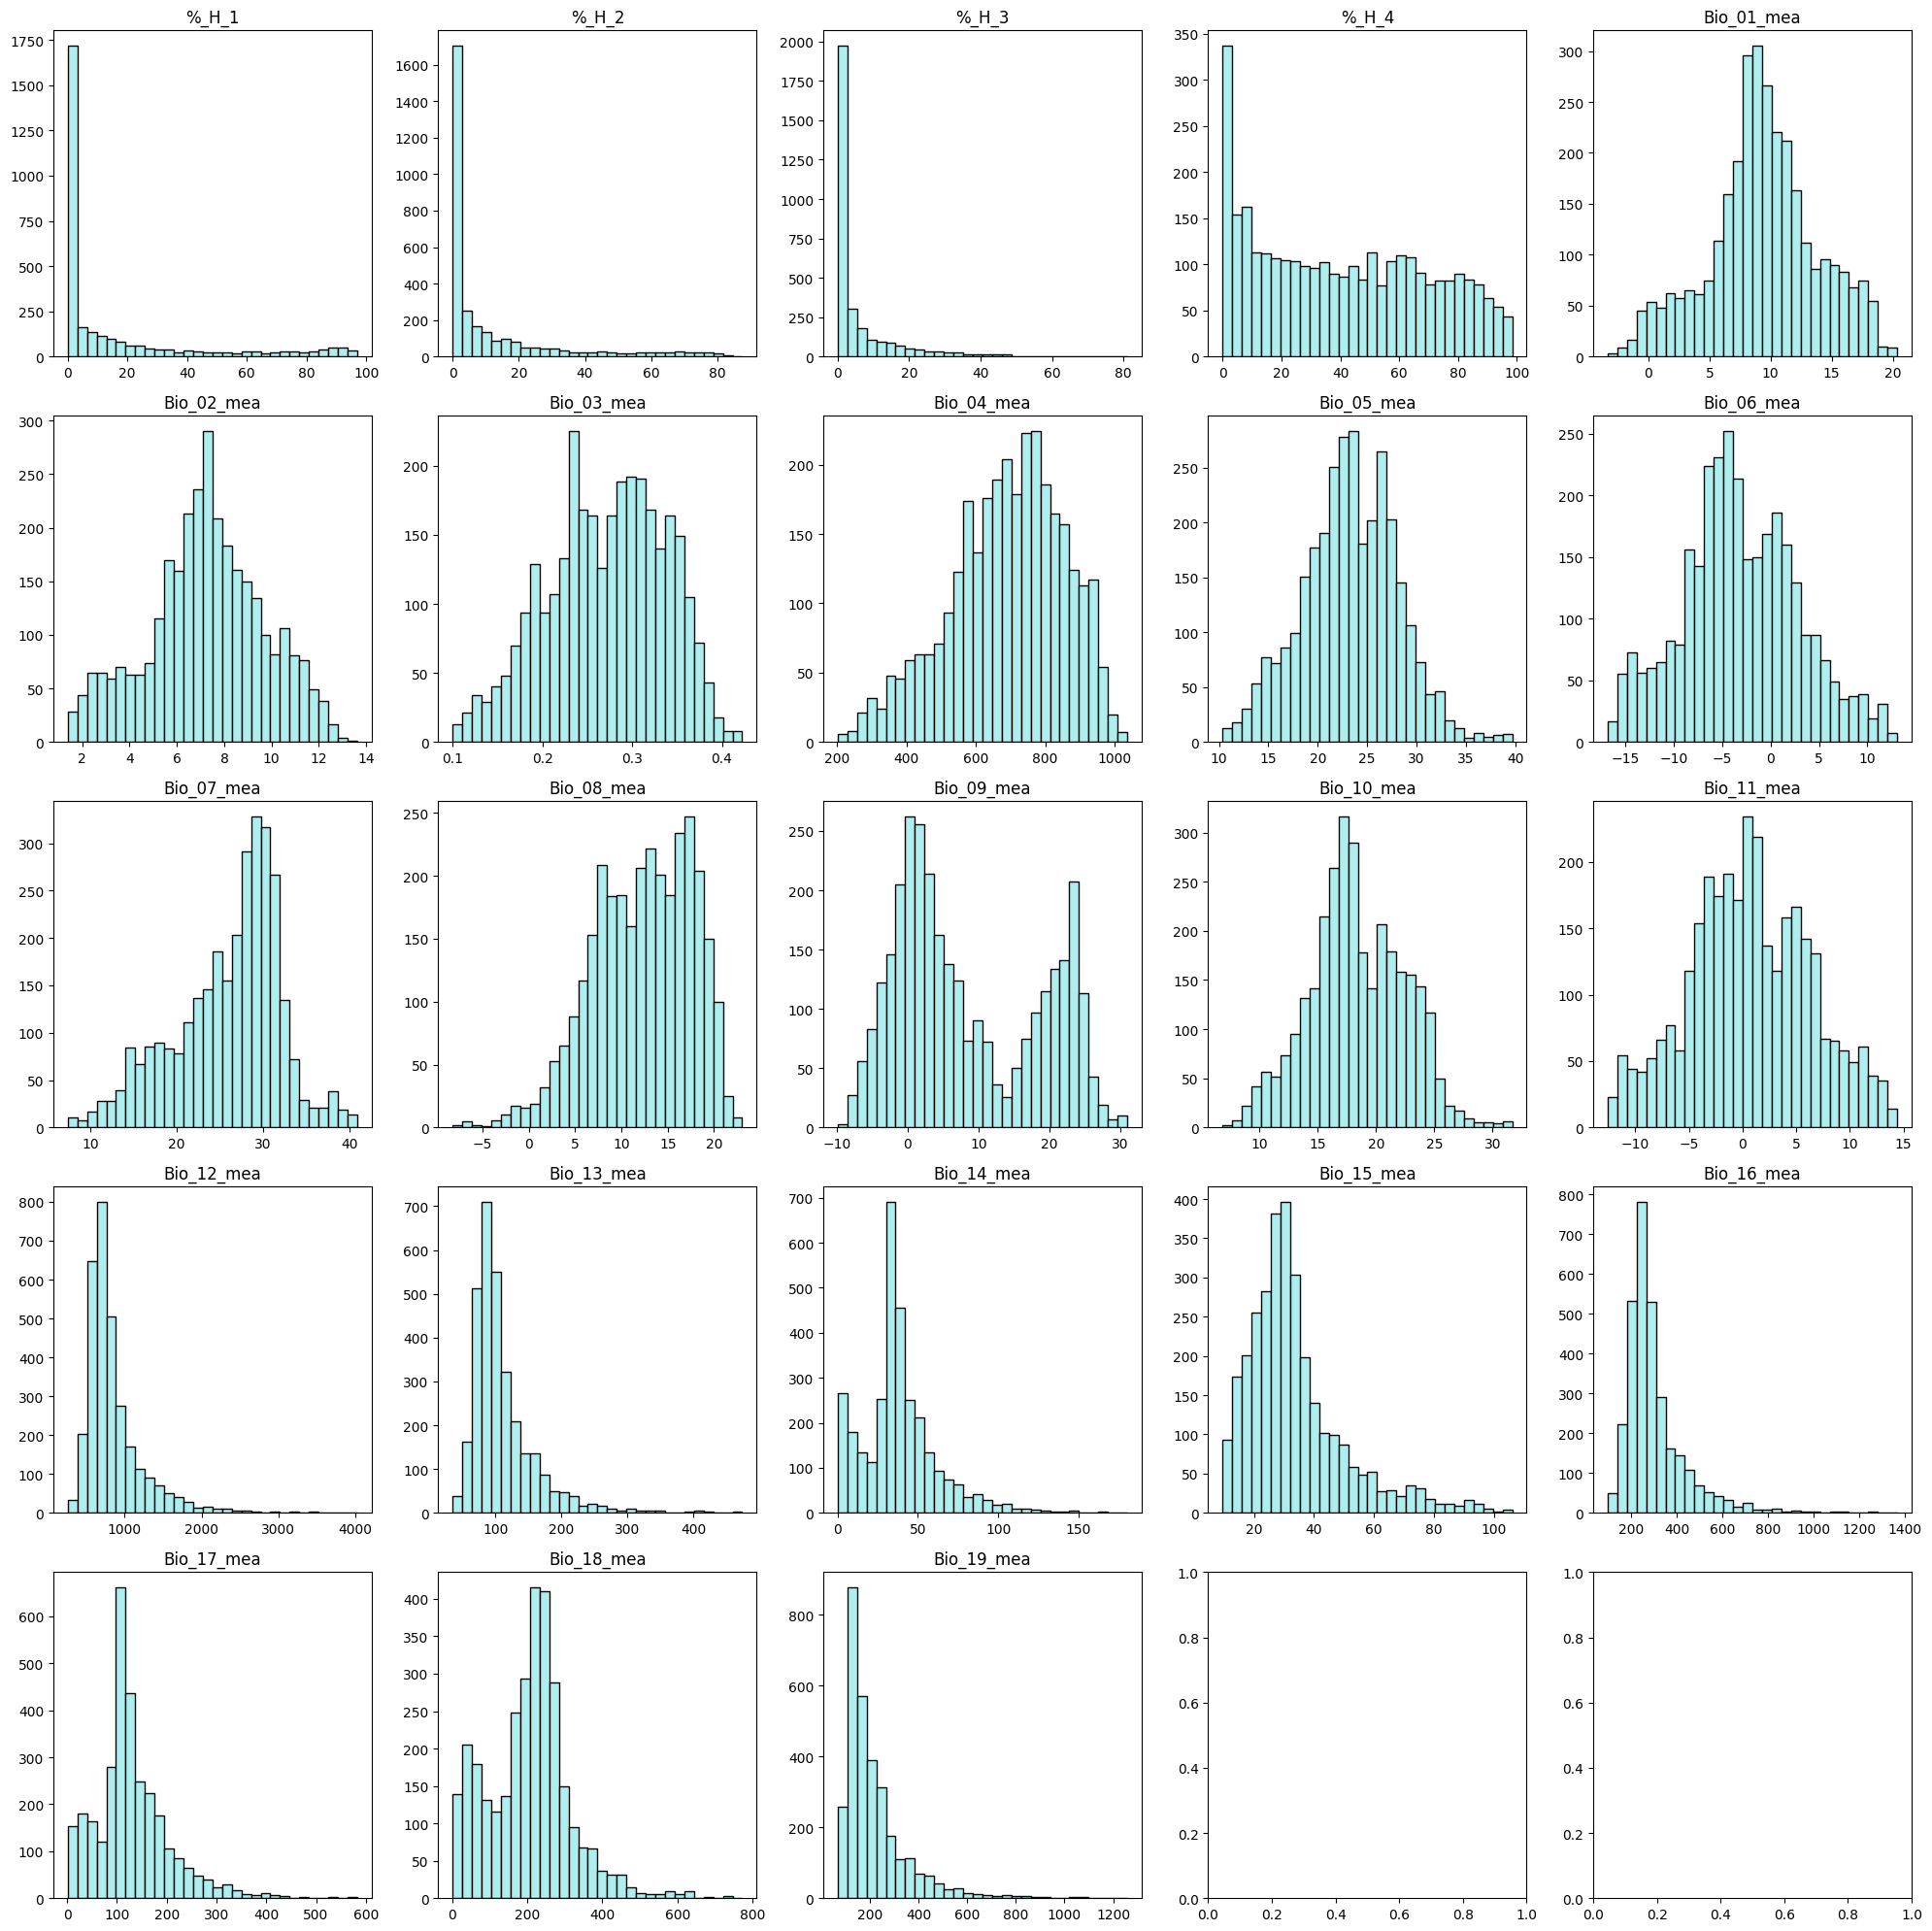

In [7]:
# Visualización de distribuciones con fondo blanco y sin red
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(variables_independientes.columns):
    ax = axes[i]
    variables_independientes[col].hist(bins=30, ax=ax, color='paleturquoise', edgecolor='black')
    ax.set_title(col)
    ax.set_facecolor('white') 
    ax.grid(False)  

plt.tight_layout()
plt.show()

## Correlaciones

### Matriz de correlación

In [8]:
matriz_correlaciones = variables_independientes.corr(method='pearson')
matriz_correlaciones

,%_H_1,%_H_2,%_H_3,%_H_4,Bio_01_mea,Bio_02_mea,Bio_03_mea,Bio_04_mea,Bio_05_mea,Bio_06_mea,...,Bio_10_mea,Bio_11_mea,Bio_12_mea,Bio_13_mea,Bio_14_mea,Bio_15_mea,Bio_16_mea,Bio_17_mea,Bio_18_mea,Bio_19_mea
%_H_1,1.000000,-0.072618,-0.185902,-0.547946,0.174230,-0.787545,-0.641583,-0.480985,-0.272358,0.444603,...,-0.040050,0.341260,0.081385,0.138168,-0.031175,0.221837,0.143639,-0.035695,-0.076357,0.158040
%_H_2,-0.072618,1.000000,-0.127731,-0.474221,-0.543627,-0.120394,-0.270277,0.253633,-0.375009,-0.476900,...,-0.443659,-0.514939,0.073447,0.066942,0.110125,-0.083521,0.066303,0.098892,0.348647,-0.079284
%_H_3,-0.185902,-0.127731,1.000000,-0.079043,-0.061925,0.109254,0.100801,0.053392,-0.035026,-0.105221,...,-0.047555,-0.077655,0.205159,0.141236,0.262176,-0.212901,0.140043,0.276201,0.196084,0.104992
%_H_4,-0.547946,-0.474221,-0.079043,1.000000,0.268897,0.559574,0.411335,0.338076,0.554486,-0.001039,...,0.448973,0.066567,-0.388379,-0.392483,-0.294599,-0.050616,-0.403510,-0.302516,-0.334705,-0.292664
Bio_01_mea,0.174230,-0.543627,-0.061925,0.268897,1.000000,0.144409,0.343954,-0.386785,0.778655,0.876251,...,0.887013,0.929924,-0.259554,-0.135359,-0.456671,0.437178,-0.136110,-0.425688,-0.707652,0.054426
Bio_02_mea,-0.787545,-0.120394,0.109254,0.559574,0.144409,1.000000,0.768625,0.472018,0.606557,-0.260492,...,0.382827,-0.086762,-0.195999,-0.160931,-0.263005,0.104002,-0.173103,-0.239687,-0.266708,-0.133841
Bio_03_mea,-0.641583,-0.270277,0.100801,0.411335,0.343954,0.768625,1.000000,-0.154161,0.436337,0.172000,...,0.284162,0.312468,0.064751,0.035636,0.007041,-0.025915,0.042155,0.040865,-0.203050,0.150039
Bio_04_mea,-0.480985,0.253633,0.053392,0.338076,-0.386785,0.472018,-0.154161,1.000000,0.235050,-0.748447,...,0.079616,-0.696392,-0.361464,-0.315705,-0.277854,0.008150,-0.340506,-0.301927,0.009056,-0.442979
Bio_05_mea,-0.272358,-0.375009,-0.035026,0.554486,0.778655,0.606557,0.436337,0.235050,1.000000,0.397574,...,0.959915,0.511940,-0.492731,-0.343678,-0.657552,0.444203,-0.359835,-0.633594,-0.754516,-0.209706
Bio_06_mea,0.444603,-0.476900,-0.105221,-0.001039,0.876251,-0.260492,0.172000,-0.748447,0.397574,1.000000,...,0.576670,0.980299,-0.052680,0.011954,-0.200352,0.286501,0.023082,-0.174615,-0.499912,0.207910


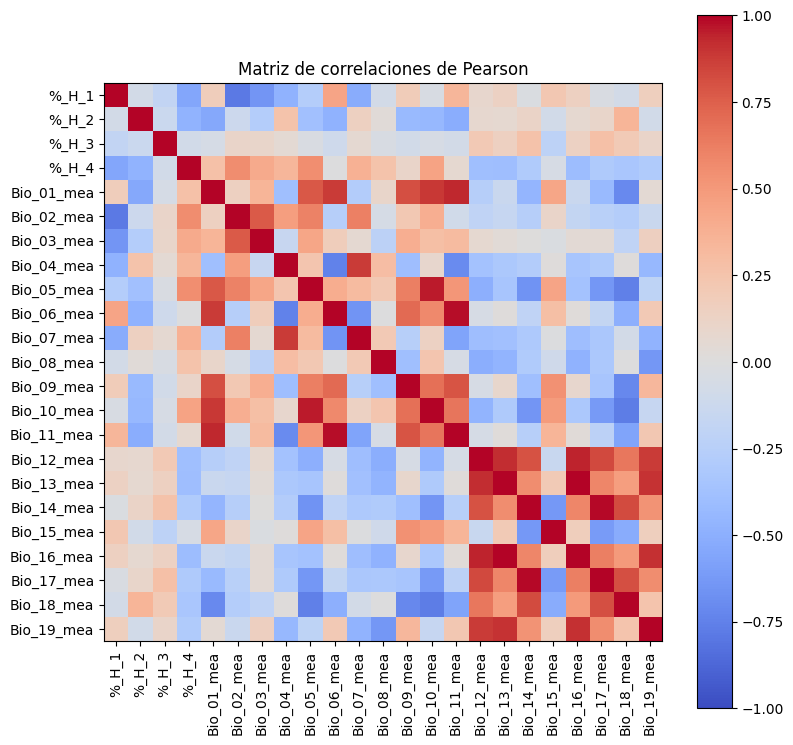

In [9]:
# Representa la matriz de correlaciones

n_ticks = len(variables_independientes.columns)
plt.figure( figsize=(9, 9) )
plt.xticks(range(n_ticks), variables_independientes.columns, rotation='vertical')
plt.yticks(range(n_ticks), variables_independientes.columns)
plt.colorbar(plt.imshow(matriz_correlaciones, interpolation='nearest', 
                            vmin=-1., vmax=1., 
                            cmap=plt.get_cmap('coolwarm')))
_ = plt.title('Matriz de correlaciones de Pearson')

### Dendograma de correlación

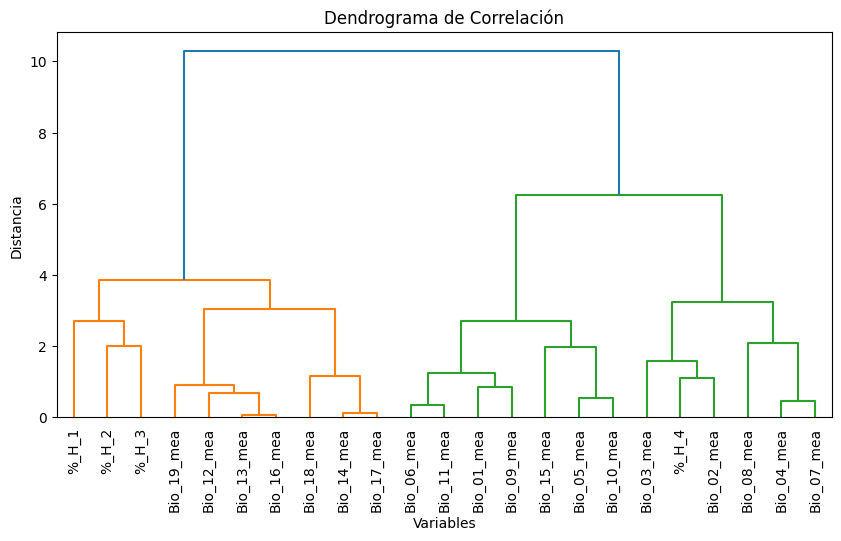

In [10]:
# Matriz de enlace
Z = linkage(matriz_correlaciones, 'ward')

# Dibuja el dendrograma
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=matriz_correlaciones.columns, leaf_rotation=90)
plt.title('Dendrograma de Correlación')
plt.xlabel('Variables')
plt.ylabel('Distancia')
plt.show()


In [11]:
# Eliminar variables altamente correlacionadas
# Se establece el umbral de corte en 0.8 para eliminar aquellos pares de variables que esten muy correlacionadas (cuya correlación absoluta sea mayor o igual a 0.8)

umbral = 0.8

# Crear una lista para mantener las columnas que queremos eliminar
columnas_para_eliminar = set()

# Iterar sobre la matriz de correlación
for i in range(len(matriz_correlaciones.columns)):
    for j in range(i):
        if abs(matriz_correlaciones.iloc[i, j]) >= umbral:
            colname = matriz_correlaciones.columns[i]
            columnas_para_eliminar.add(colname)

print("Variables altamente correlacionadas para eliminar:", columnas_para_eliminar)

Variables altamente correlacionadas para eliminar: {'Bio_11_mea', 'Bio_18_mea', 'Bio_17_mea', 'Bio_16_mea', 'Bio_10_mea', 'Bio_13_mea', 'Bio_14_mea', 'Bio_09_mea', 'Bio_19_mea', 'Bio_06_mea', 'Bio_07_mea'}


In [12]:
# Nuevo dataframe con las variables seleccionadas
variables_seleccionadas = df.drop(columns=columnas_para_eliminar)

# Agregar las columnas de identificación y coordenadas
df_final = pd.concat([identificadores, variables_seleccionadas], axis=1)

df_final.head()

,ET_ID,X,Y,ET_ID,%_H_1,%_H_2,%_H_3,%_H_4,Bio_01_mea,Bio_02_mea,Bio_03_mea,Bio_04_mea,Bio_05_mea,Bio_08_mea,Bio_12_mea,Bio_15_mea,X,Y
0,249,-2,35,249,35.2700,0.0000,0.0000,37.6820,18.2550,8.4956,0.3680,462.7157,29.4562,13.8649,345.2101,57.2502,-2,35
1,280,14,36,280,90.1848,0.0000,0.0000,5.5578,19.1658,1.5286,0.1101,436.0108,26.6743,16.1710,510.0062,83.7500,14,36
2,363,-3,35,363,83.4716,0.0000,0.0000,10.1952,18.4622,3.7568,0.2389,374.3991,26.1882,14.9681,379.8207,62.7896,-3,35
3,412,24,35,412,45.9390,2.0083,0.0374,16.6332,17.7280,4.3377,0.2251,507.0172,27.5252,13.1808,802.8021,93.5241,24,35
4,413,24,35,413,49.8403,0.1527,0.0000,20.5800,17.6329,3.9212,0.2078,509.2899,26.9524,13.0027,734.0307,90.5660,24,35


In [13]:
# Exportar el resultado final a CSV con separador decimal como punto
df_final.to_csv('Data/Variables/variables_seleccionadas_SDM.csv', index=False, decimal='.')

Por consiguiente, las variables que se utilizarán para realizar el modelo de distribución de especies son las siguientes

Variables climaticas:

- **Bio_01_mea**: Temperatura media anual
- **Bio_02_mea**: Rango medio diurno (Media mensual (temperatura máxima - temperatura mínima))
- **Bio_03_mea**: Isotermalidad (BIO2/BIO7) (×100)
- **Bio_04_mea**: Estacionalidad de la temperatura (desviación estándar ×100)
- **Bio_05_mea**: Temperatura máxima del mes más cálido
- **Bio_08_mea**: Temperatura media del trimestre más húmedo
- **Bio_12_mea**: Precipitación Anual
- **Bio_15_mea**: Estacionalidad de las Precipitaciones (Coeficiente de Variación)

Variables del porcentaje de disponibilidad de habitat:
- **%_H_1**: Zonas acuaticas
- **%_H_2**: Vegetación Arbórea Perenne
- **%_H_3**: Vegetación Arbórea Caduca
- **%_H_4**: Matorrales y Pastizales
